# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Za jedinečný identifikátor zastávky můžete považovat **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek můžete uvažovat, že se jedná o jednu a tutéž stanici (v mnoha případech to i platí). 

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

## Řešení

### *✨ Dataset + ⚙️ Předzpracování dat*

**Naimportujeme potřebné knihovny**

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

**Načtěme si dataset**

In [2]:
pid_df = pd.read_csv('d.csv')

**Seznámení s datasetem pid**

In [3]:
pid_df.info()
pid_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  int64 
 8   monday          1642433 non-null  int64 
 9   tuesday         1642433 non-null  int64 
 10  wednesday       1642433 non-null  int64 
 11  thursday        1642433 non-null  int64 
 12  friday          1642433 non-null  int64 
 13  saturday        1642433 non-null  int64 
 14  sunday          1642433 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 188.0+ MB


,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,U2991Z301,Hněvice,T58005,Hněvice seř.n.,4:53:00,4:54:30,2,0,1,1,1,1,1,0,0
1,T58005,Hněvice seř.n.,U4610Z301,Záluží,4:54:30,4:56:00,2,0,1,1,1,1,1,0,0
2,U4610Z301,Záluží,U4609Z301,Dobříň,4:56:00,4:59:00,2,0,1,1,1,1,1,0,0
3,U4609Z301,Dobříň,U4608Z301,Roudnice nad Labem,4:59:00,5:03:00,2,0,1,1,1,1,1,0,0
4,U4608Z301,Roudnice nad Labem,U4609Z301,Dobříň,4:36:00,4:38:00,2,0,1,1,1,1,1,0,0


**Dropneme nepotřebné přiznaky**

> Odstranění sloupců `stop_from` a `stop_to` je výhodné, protože sloupce `stop_from_name` a `stop_to_name` již poskytují unikátní identifikátory pro zastávky. Tím se zjednodušuje analýza dat, protože se zaměřujeme na názvy zastávek místo na složité kódy. Různé typy dopravy mohou mít stejné názvy zastávek, takže jejich odstraněním se zlepší konzistence a agregace dat napříč trasami.

In [4]:
pid_df.drop(columns=['stop_from', 'stop_to'], inplace=True)

**Převedeme typ dopravy z kodu na název**

In [5]:
num_to_trans = {
    0: 'Tram',
    1: 'Metro',
    2: 'Vlak',
    3: 'Bus',
    4: 'Privoz',
    7: 'Lanovka'
}

pid_df['route_type']=pid_df['route_type'].replace(num_to_trans)

**Zkonvertujeme kategorické a boolean přiznaky**

In [6]:
categorical1=['stop_from_name', 'stop_to_name', 'route_type']
boolean1=['is_night', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

for cols in categorical1:
    pid_df[cols]=pid_df[cols].astype('category')

for cols in boolean1:
    pid_df[cols]=pid_df[cols].astype(bool)    

> Konverze sloupců na správné datové typy přináší několik výhod. Použití typu `category` pro sloupce jako `stop_from_name` a `route_type` šetří paměť, protože ukládá pouze unikátní hodnoty. Převod dnů v týdnu na boolean hodnoty usnadňuje filtrování podle konkrétního dne nebo nočního spoje. Kategorické datové typy zjednodušují interpretaci dat a usnadňují analýzu. Konzistentní datové typy také zajišťují správnost analýz.

**Opravíme chyby v časech, nastavíme spravný typ dat (datetime64)**

In [7]:
def fix_time_format(time):
    h, m, s = [int(x) for x in time.split(':')]
    h %= 24
    return f'{h:02}:{m:02}:{s:02}'

In [8]:
pid_df['depart_from']=pid_df['depart_from'].apply(fix_time_format)
pid_df['arrive_to']=pid_df['arrive_to'].apply(fix_time_format)

pid_df['depart_from']=pd.to_datetime(pid_df['depart_from'], format='%H:%M:%S').dt.time
pid_df['arrive_to']=pd.to_datetime(pid_df['arrive_to'], format='%H:%M:%S').dt.time

pid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   stop_from_name  1642433 non-null  category
 1   stop_to_name    1642433 non-null  category
 2   depart_from     1642433 non-null  object  
 3   arrive_to       1642433 non-null  object  
 4   route_type      1642433 non-null  category
 5   is_night        1642433 non-null  bool    
 6   monday          1642433 non-null  bool    
 7   tuesday         1642433 non-null  bool    
 8   wednesday       1642433 non-null  bool    
 9   thursday        1642433 non-null  bool    
 10  friday          1642433 non-null  bool    
 11  saturday        1642433 non-null  bool    
 12  sunday          1642433 non-null  bool    
dtypes: bool(8), category(3), object(2)
memory usage: 46.0+ MB


> Můžeme vidět, že nyní dataset zabírá 46 MB namísto původních 188 MB před zpracováním dat.

**Načtěme si dataset stops**

In [9]:
stops_df=pd.read_csv('stops.txt')
stops_df.info()
stops_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16435 entries, 0 to 16434
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              16435 non-null  object 
 1   stop_name            15936 non-null  object 
 2   stop_lat             16435 non-null  float64
 3   stop_lon             16435 non-null  float64
 4   zone_id              15408 non-null  object 
 5   stop_url             0 non-null      float64
 6   location_type        16435 non-null  int64  
 7   parent_station       954 non-null    object 
 8   wheelchair_boarding  16435 non-null  int64  
 9   level_id             954 non-null    object 
 10  platform_code        14750 non-null  object 
 11  asw_node_id          15748 non-null  float64
 12  asw_stop_id          15354 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.6+ MB


,stop_id,stop_name,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,level_id,platform_code,asw_node_id,asw_stop_id
0,U50S1,Budějovická,50.044411,14.448787,P,NaN,1,NaN,1,NaN,NaN,50.0,NaN
1,U52S1,Chodov,50.031672,14.490961,P,NaN,1,NaN,1,NaN,NaN,52.0,NaN
2,U75S1,Kolbenova,50.110395,14.516398,P,NaN,1,NaN,1,NaN,NaN,75.0,NaN
3,U78S1,Ládví,50.126591,14.469451,P,NaN,1,NaN,1,NaN,NaN,78.0,NaN
4,U100S1,Vltavská,50.100298,14.438492,P,NaN,1,NaN,1,NaN,NaN,100.0,NaN


**Nechame jenom potřebné slopuce, zgrupujeme a použijeme střední hodnoty lokace zastavek**

In [10]:
stops_df=stops_df.dropna(subset=['stop_name'])
stops_df = stops_df.groupby('stop_name', as_index=False).apply(
    lambda x: pd.Series({'stop_lat': x['stop_lat'].mean(), 'stop_lon': x['stop_lon'].mean()}), include_groups=False).reset_index()

### *🕸️ Základní síťová analýza*

**`Pro analýzu jsem zvolila dataset tramvajových zastávek`**

In [11]:
tram_data = pid_df.query('route_type == "Tram"')

used_stops = pd.unique(tram_data[['stop_from_name', 'stop_to_name']].values.ravel())
filtered_stops = stops_df[stops_df['stop_name'].isin(used_stops)]

tram_edges_weights = tram_data.groupby(['stop_from_name', 'stop_to_name'], observed=False).size().reset_index(name='weight')
tram_edges_weights = tram_edges_weights[tram_edges_weights['weight'].gt(0)]

G_tram = nx.Graph()

for stop in filtered_stops.itertuples(index=False):
    G_tram.add_node(stop.stop_name, pos=(stop.stop_lon, stop.stop_lat))

for edge in tram_edges_weights.itertuples(index=False):
    G_tram.add_edge(edge.stop_from_name, edge.stop_to_name, weight=edge.weight)


In [21]:
# Filter for metro routes in the data
metro_data = pid_df.query('route_type == "Metro"')

# Extract unique stop names used by metro routes
used_metro_stops = pd.unique(metro_data[['stop_from_name', 'stop_to_name']].values.ravel())
filtered_metro_stops = stops_df[stops_df['stop_name'].isin(used_metro_stops)]

# Compute weights for each metro edge
metro_edges_weights = metro_data.groupby(['stop_from_name', 'stop_to_name'], observed=False).size().reset_index(name='weight')
metro_edges_weights = metro_edges_weights[metro_edges_weights['weight'].gt(0)]

# Initialize the metro graph
G_metro = nx.Graph()

# Add metro stops as nodes with position attributes
for stop in filtered_metro_stops.itertuples(index=False):
    G_metro.add_node(stop.stop_name, pos=(stop.stop_lon, stop.stop_lat))

# Add edges with weights between metro stops
for edge in metro_edges_weights.itertuples(index=False):
    G_metro.add_edge(edge.stop_from_name, edge.stop_to_name, weight=edge.weight)


> Zde vytváříme vizualizaci grafu tramvajových zastávek a jejich tras. Nastavujeme černé pozadí pro zvýšení kontrastu, čímž se zlepší viditelnost uzlů a hran. Vykreslujeme trasy jako oranžové hrany a zastávky jako zelené uzly, přičemž přidáváme popisky pro jasnou identifikaci zastávek. Tento přístup zajišťuje přehlednost a usnadňuje analýzu tramvajových spojení v Praze.

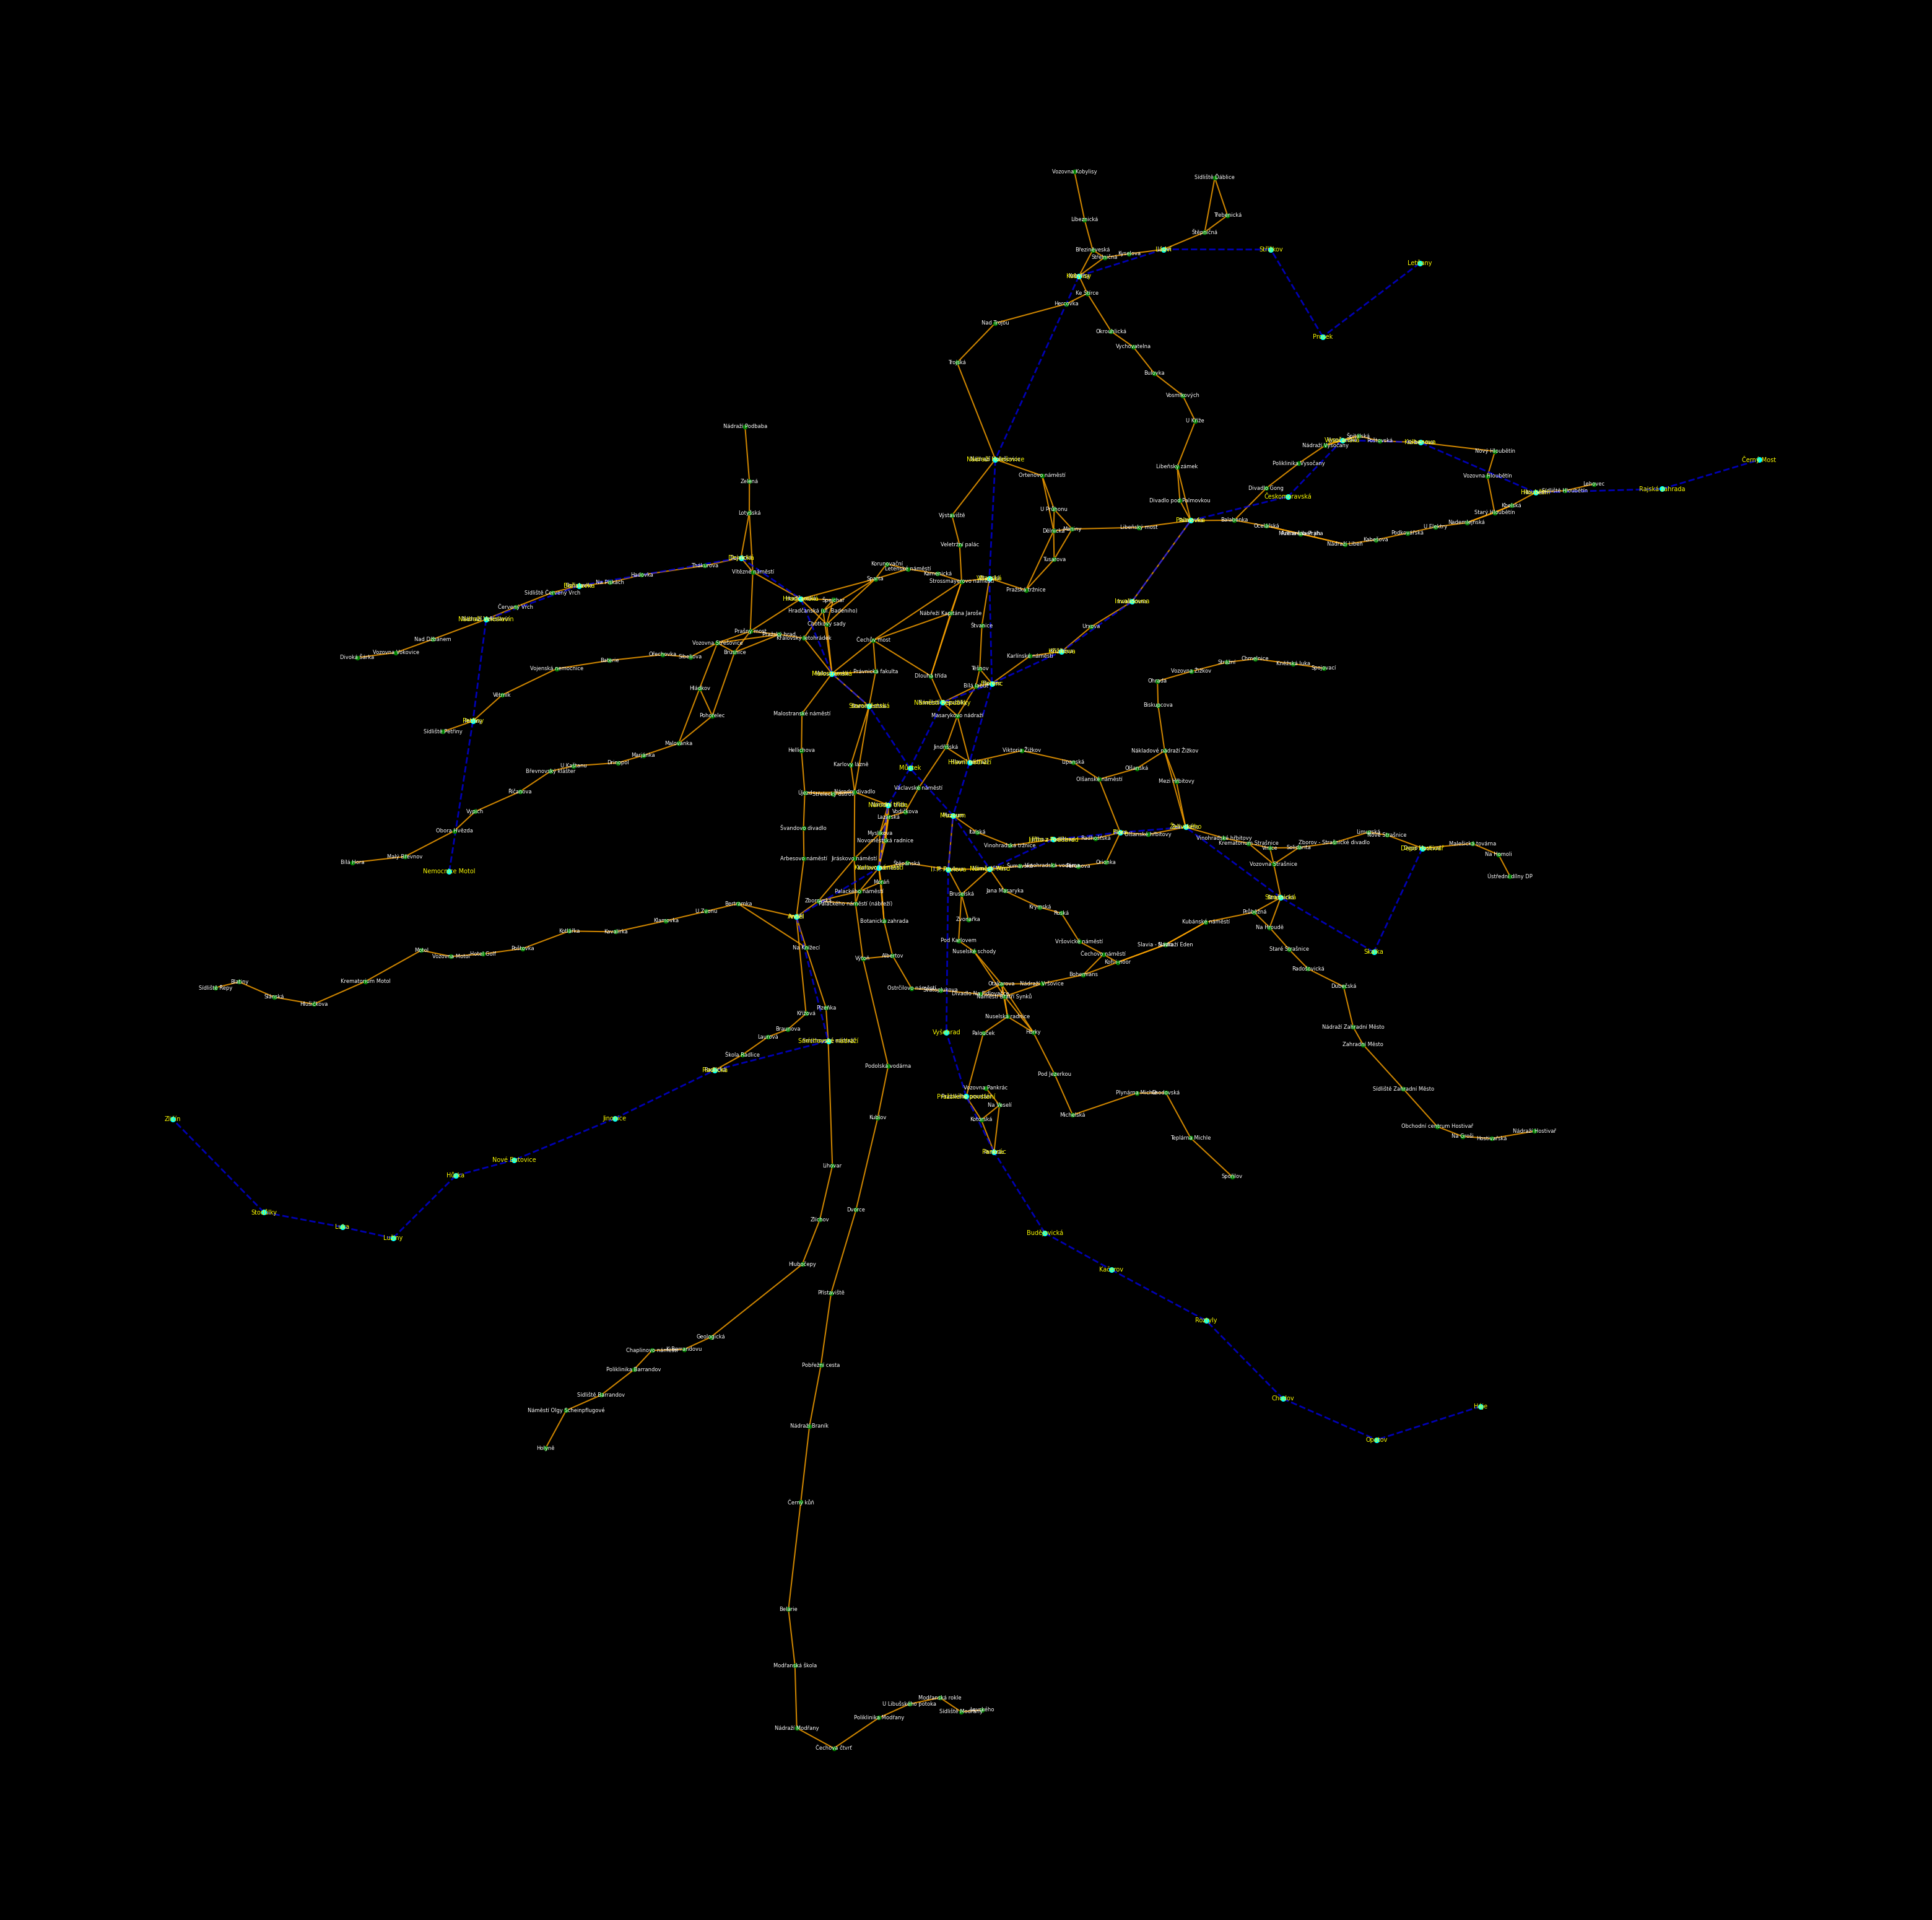

In [ ]:
# Combined tram and metro graph visualization
fig, ax = plt.subplots(figsize=(40, 40))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Get positions for tram and metro nodes
tram_positions = nx.get_node_attributes(G_tram, 'pos')
metro_positions = nx.get_node_attributes(G_metro, 'pos')

# Draw tram network
nx.draw_networkx_edges(
    G_tram,
    pos=tram_positions,
    edge_color='orange',
    width=1.5,
    alpha=0.8,
    ax=ax
)
nx.draw_networkx_nodes(
    G_tram,
    pos=tram_positions,
    node_size=20,
    node_color='green',
    ax=ax
)
nx.draw_networkx_labels(
    G_tram,
    pos=tram_positions,
    font_size=6,
    font_color='white',
    ax=ax
)

# Turn off axis for a clean visualization
ax.axis('off')
plt.show()



> Ted provádíme analýzu a vizualizaci tramvajových zastávek v Praze pomocí interaktivní mapy a knihovny `folium`. Nejprve definujeme střed mapy jako střed Prahy a přidáme značky pro jednotlivé zastávky. Následně vizualizujeme tramvajové trasy jako čáry spojující zastávky. Tento přístup usnadňuje porozumění tramvajové síti a jejímu propojení.

In [13]:
import folium

map_center = [50.0755, 14.4378]  # Center of Prague
prague_map = folium.Map(location=map_center, zoom_start=13, tiles='CartoDB dark_matter')

for stop_name, (lon, lat) in tram_positions.items():
    folium.CircleMarker(
        location=[lat, lon],
        radius=4,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=1,
        popup=stop_name
    ).add_to(prague_map)

for u, v, data in G_tram.edges(data=True):
    start = tram_positions.get(u)
    end = tram_positions.get(v)
    if start and end:
        folium.PolyLine(
            locations=[[start[1], start[0]], [end[1], end[0]]],
            color='orange',
            weight=2,
            opacity=0.8
        ).add_to(prague_map)

prague_map


> V tomto kódu jsme přidali značky pro tramvajové zastávky pomocí folium.Marker, což umožňuje popisky zastávek. To usnadňuje uživatelům identifikaci jednotlivých zastávek.

#### **Měry centrality**

##### **1. Stupňová centralita**

In [ ]:
degree_centrality = dict(G_tram.degree())

top_5_dcentral_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
least_5_dcentral_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=False)[:5]

print("Nejvyšší stupeň:")
for node, centrality in top_5_dcentral_nodes:
    print(f"{node}: Stupňová centralita = {centrality}")

print()
print("Nejnižší stupeň:")
for node, centrality in least_5_dcentral_nodes:
    print(f"{node}: Stupňová centralita = {centrality}")    

Nejvyšší stupeň:
Karlovo náměstí: Stupňová centralita = 8
Malostranská: Stupňová centralita = 7
Náměstí Bratří Synků: Stupňová centralita = 6
Národní divadlo: Stupňová centralita = 6
Otakarova: Stupňová centralita = 6

Nejnižší stupeň:
Bílá Hora: Stupňová centralita = 1
Divoká Šárka: Stupňová centralita = 1
Holyně: Stupňová centralita = 1
Lehovec: Stupňová centralita = 1
Levského: Stupňová centralita = 1


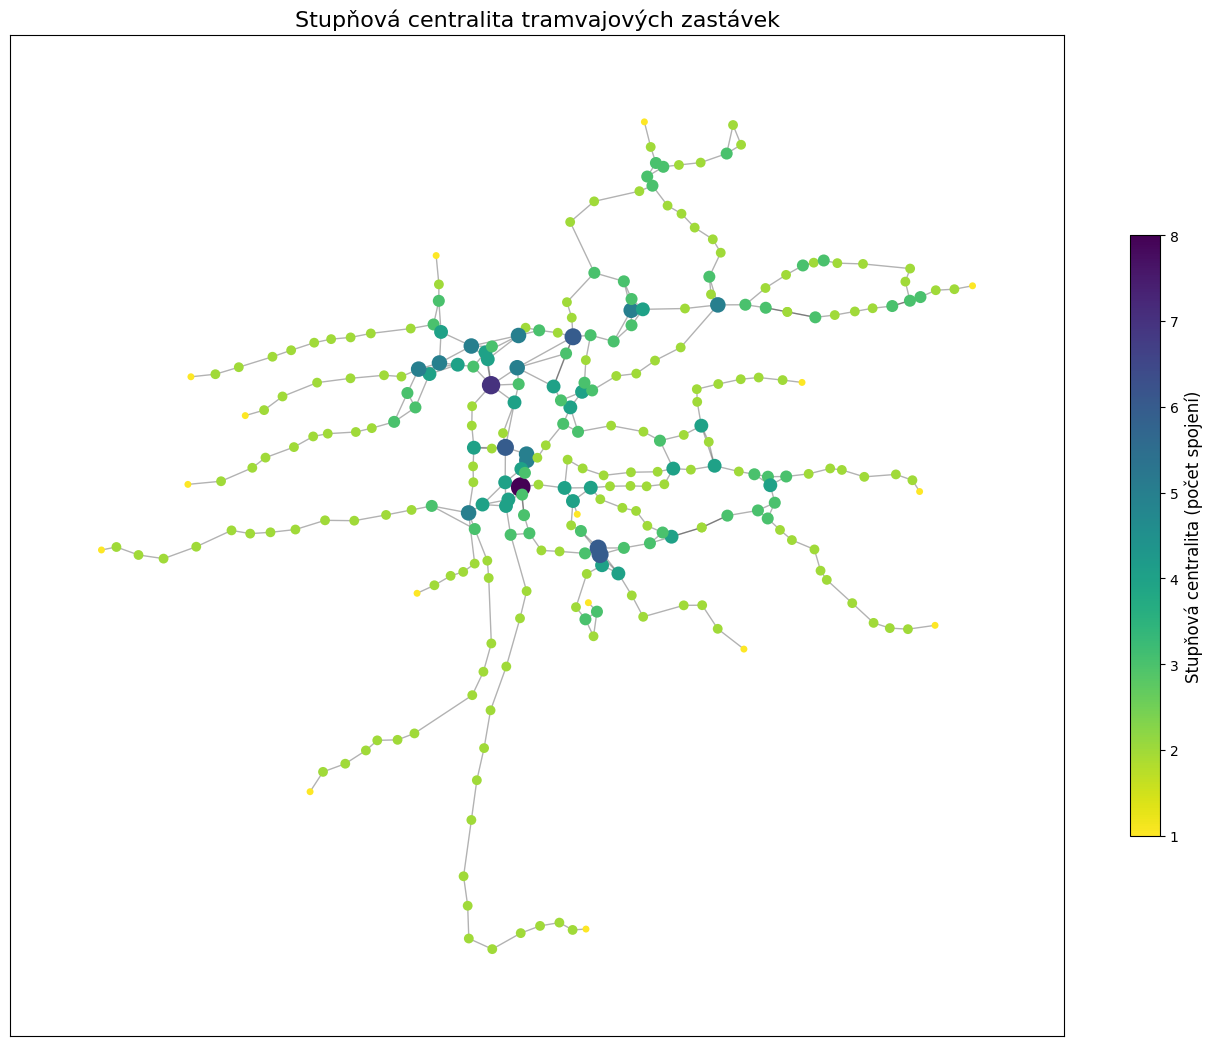

In [15]:
fig, ax = plt.subplots(figsize=(17, 13))
pos = {stop.stop_name: (stop.stop_lon, stop.stop_lat) for stop in filtered_stops.itertuples(index=False)}
nx.draw_networkx_edges(G_tram, pos, edge_color='black', alpha=0.3)

node_colors = [degree_centrality[node] for node in G_tram.nodes()]
node_sizes = [25 * degree_centrality[node] for node in G_tram.nodes()]
nodes_drawn = nx.draw_networkx_nodes(G_tram, pos, node_color=node_colors, cmap=plt.cm.viridis_r, node_size=node_sizes, edgecolors='none')


cbar = fig.colorbar(nodes_drawn, shrink=0.6)
cbar.set_label('Stupňová centralita (počet spojení)', fontsize=12)
ax.set_title('Stupňová centralita tramvajových zastávek', fontsize=16)
plt.show()


> Vidíme, že `nejvyšší stupeň centrality` mají zastávky v `centru města`, zatímco `nejnižší` stupeň (1 nebo 2) mají většinou `konečné` zastávky. Z vizualizace centrality také vidíme, že `většina zastávek` má `stupeň centrality 2`, což znamená, že se nachází mezi dvěma jinými zastávkami.

##### **2. Centralita blízkosti**

In [16]:
closeness_centrality = nx.closeness_centrality(G_tram)

top_5_ccentral_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
least_5_ccentral_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=False)[:5]

print("Nejvyšší stupeň:")
for node, centrality in top_5_ccentral_nodes:
    print(f"{node}: Centralita blízkosti = {centrality:.5f}")

print()
print("Nejnižší stupeň:")
for node, centrality in least_5_ccentral_nodes:
    print(f"{node}: Centralita blízkosti = {centrality:.5f}")


Nejvyšší stupeň:
Malostranská: Centralita blízkosti = 0.09979
Národní divadlo: Centralita blízkosti = 0.09887
Staroměstská: Centralita blízkosti = 0.09856
Čechův most: Centralita blízkosti = 0.09828
Právnická fakulta: Centralita blízkosti = 0.09811

Nejnižší stupeň:
Nádraží Hostivař: Centralita blízkosti = 0.03819
Levského: Centralita blízkosti = 0.03830
Lehovec: Centralita blízkosti = 0.03953
Hostivařská: Centralita blízkosti = 0.03970
Sídliště Modřany: Centralita blízkosti = 0.03982


> Na základě těchto výsledků lze říci, že zastávky umístěné `v centru` města mají `nejvyšší centralitu blízkosti`, zatímco `konečné` zastávky vykazují `nejnižší` hodnoty. To znamená, že vzdálenost z centra města k ostatním zastávkám je obvykle menší než z okrajových částí města, což je logické.

##### **3. Centralita mezilehlosti**

In [17]:
betweenness_centrality = nx.betweenness_centrality(G_tram)

top_5_bcentral_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
least_5_bcentral_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=False)[:5]

print("Nejvyšší stupeň:")
for node, centrality in top_5_bcentral_nodes:
    print(f"{node}: Centralita mezilehlosti = {centrality:.5f}")

print()
print("Nejnižší stupeň:")
for node, centrality in least_5_bcentral_nodes:
    print(f"{node}: Centralita mezilehlosti = {centrality:.5f}")

Nejvyšší stupeň:
Malostranská: Centralita mezilehlosti = 0.34807
Národní divadlo: Centralita mezilehlosti = 0.32212
Staroměstská: Centralita mezilehlosti = 0.30876
Čechův most: Centralita mezilehlosti = 0.29538
Strossmayerovo náměstí: Centralita mezilehlosti = 0.27295

Nejnižší stupeň:
Bílá Hora: Centralita mezilehlosti = 0.00000
Divadlo pod Palmovkou: Centralita mezilehlosti = 0.00000
Divoká Šárka: Centralita mezilehlosti = 0.00000
Holyně: Centralita mezilehlosti = 0.00000
Karlovy lázně: Centralita mezilehlosti = 0.00000


> Na základě těchto výsledků lze říci, že zastávky umístěné `v centru` města mají `nejvyšší centralitu mezilehlosti`, zatímco `konečné` zastávky mají `nejnižší` hodnoty. To znamená, že většina tramvajových cest prochází městskými částmi v centru, ale ne konečnými zastávkami, což je také logické.


### **❓ Vlastní otázky**

#### Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?

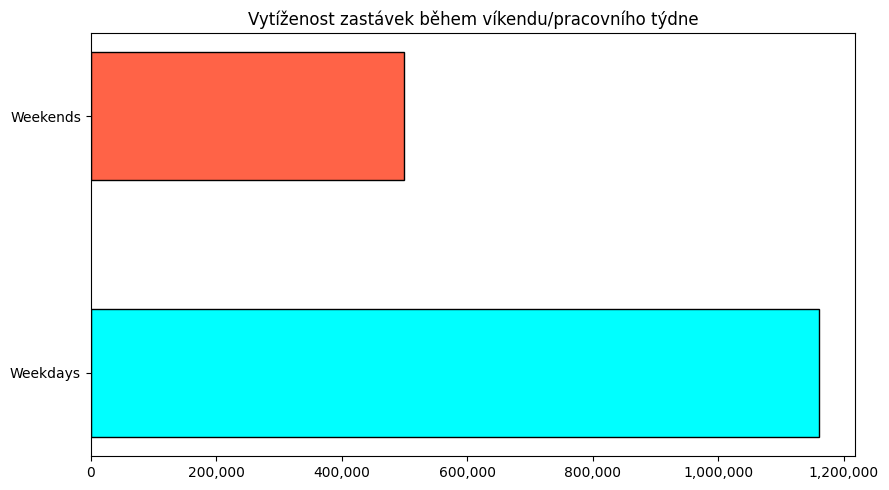

In [18]:
weekday_stats = pid_df[['monday', 'tuesday', 'wednesday', 'thursday', 'friday']].sum()
weekday_stats_avg = weekday_stats.sum() / 5

weekend_stats = pid_df[['saturday', 'sunday']].sum()
weekend_stats_avg = weekend_stats.sum() / 2

avgs = [weekday_stats_avg, weekend_stats_avg]
cats = ['Weekdays', 'Weekends']

ax, fig = plt.subplots(figsize=(9,5))
plt.barh(cats, avgs, color=['aqua', 'tomato'], height=0.5, edgecolor='black')
ticks = np.arange(0, max(avgs) + 100000, 200000)
plt.xticks(ticks, [f"{x:,.0f}" for x in ticks])
plt.title('Vytíženost zastávek během víkendu/pracovního týdne')
plt.tight_layout()

> Pro zodpovězení této otázky jsem zvolila reprezentaci dat pomocí `horizontálního bar chartu`. Z grafu můžeme vidět, že `vytíženost zastávek` během `pracovního dne` je `mnohem vyšší` než o `víkendu`, přibližně `2.3 krát`. Tato vizualizace poskytuje jasný přehled o rozdílech v dopravní vytíženosti mezi pracovním týdnem a víkendem.

#### Je rozdíl ve vytíženosti zastávek během dne?

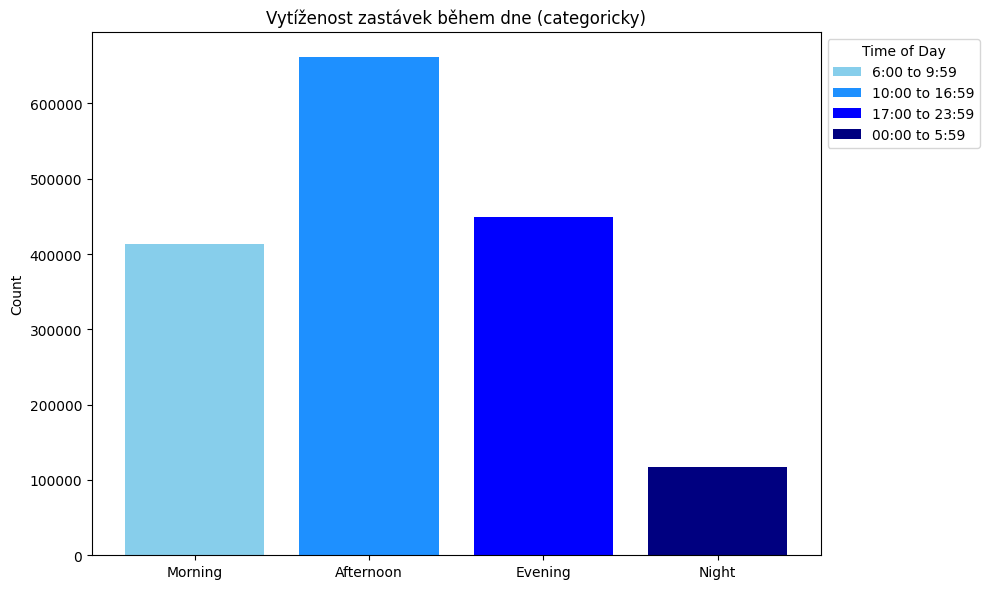

In [19]:
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

pid_df['hour'] = pid_df['depart_from'].apply(lambda x: x.hour)
pid_df['time_of_day'] = pid_df['hour'].apply(categorize_time)
time_of_day_stats = pid_df.groupby('time_of_day').size().reset_index(name='count')

cats = ['Morning', 'Afternoon', 'Evening', 'Night']
time_of_day_stats['time_of_day'] = pd.Categorical(time_of_day_stats['time_of_day'], categories=cats)
time_of_day_stats = time_of_day_stats.sort_values('time_of_day').reset_index(drop=True)

categories = time_of_day_stats['time_of_day']
counts = time_of_day_stats['count']

colors = ['skyblue', 'dodgerblue', 'blue', 'navy']
labels = ['6:00 to 9:59', '10:00 to 16:59', '17:00 to 23:59', '00:00 to 5:59']

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=colors)
plt.legend(bars, labels, title='Time of Day', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.ylabel('Count')
plt.title('Vytíženost zastávek během dne (categoricky)')
plt.tight_layout()
plt.show()

> Z tohoto grafu je vidět, že `největší` využití dopravy nastává odpoledne (`'Aftrnoon'` od 10 do 17 hodin). Druhým nejběžnějším časem je večer (`'Evening'`od 17 do 00 hodin), kdy se většina lidí vrací domů z práce. Nepřekvapivě je `nejméně` frekventovaný čas noc (`'Night'` od 0 do 6 hodin).

#### Jaký je nejvíc použivaný typ dopravy (podle počtu odjezdů během tydne)?

> Použití logaritmické škály je výhodné, když se hodnoty výrazně liší, což umožňuje lépe zobrazit i méně časté kategorie. Tato škála zmenšuje rozdíly mezi vysokými a nízkými hodnotami, čímž pomáhá lépe porovnávat různé typy dat. Logaritmická škála je také užitečná pro znázornění multiplikativních vztahů a zabraňuje přehlednosti, kdy vyšší hodnoty zakrývají nižší.

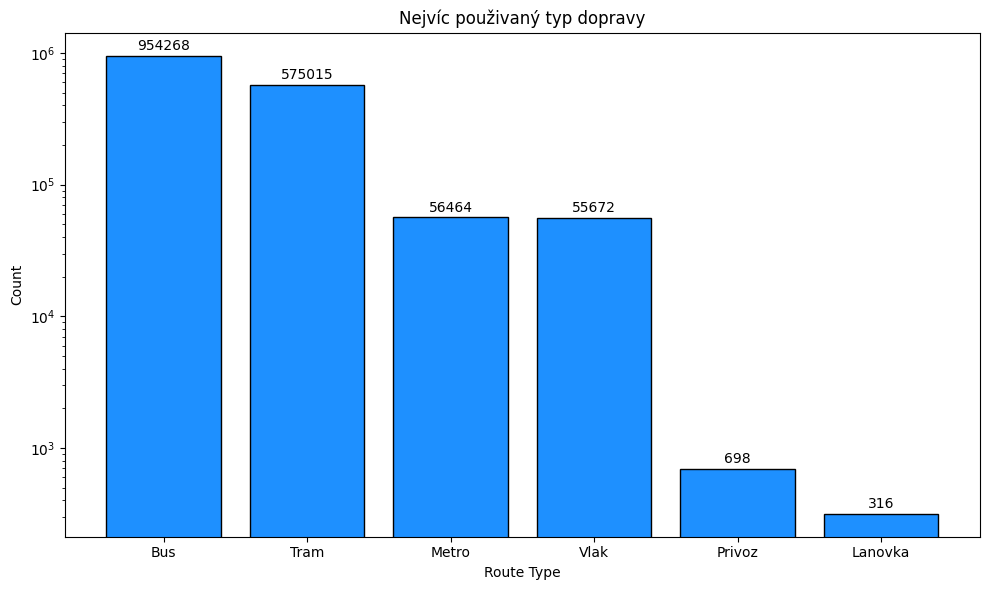

In [20]:
route_type_df = pid_df['route_type'].value_counts()

route_types = route_type_df.index
counts = route_type_df.values

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(route_types, counts, color='dodgerblue', edgecolor="black")
ticks = np.arange(0, max(counts) + 100000, 200000)
plt.yticks(ticks, [f"{x:,.0f}" for x in ticks])
for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10, padding=2)
# log scale!!!
ax.set_yscale('log')        
ax.set_xlabel('Route Type')
ax.set_ylabel('Count')
ax.set_title('Nejvíc použivaný typ dopravy')
plt.tight_layout()
plt.show()

> Tento graf ukazuje, že `největší` počet jízd během týdne vykonávají `autobusy`, následované `tramvajemi`. `Metro a vlaky` mají `téměř stejnou` úroveň popularity, zatímco `přívozy a lanovky` mají `nejnižší` počet jízd, pravděpodobně kvůli omezenému počtu linek.